True Label: 1, Predicted Label: 1
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 5, Predicted Label: 5
True Label: 2, Predicted Label: 2
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 3, Predicted Label: 3
True Label: 2, Predicted Label: 2
True Label: 6, Predicted Label: 6
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 2, Predicted Label: 2
True Label: 0, Predicted Label: 0
True Label: 3, Predicted Label: 3
True Label: 2, Predicted Label: 2
True Label: 1, Predicted Label: 4
True Label: 2, Predicted Label: 2
True Label: 5, Predicted Label: 5
True Label: 3, Predicted Label: 3
True Label: 6, Predicted Label: 6
True Label: 5, Predicted Label: 5
True Label: 6, Predicted Label: 6
True Label: 3, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 3, Predicted Label: 3
True Label: 1, Predicted Label: 4
True Label: 2, Predicted Label: 6
True Label: 6, Predicted Label: 6
True Label: 3,

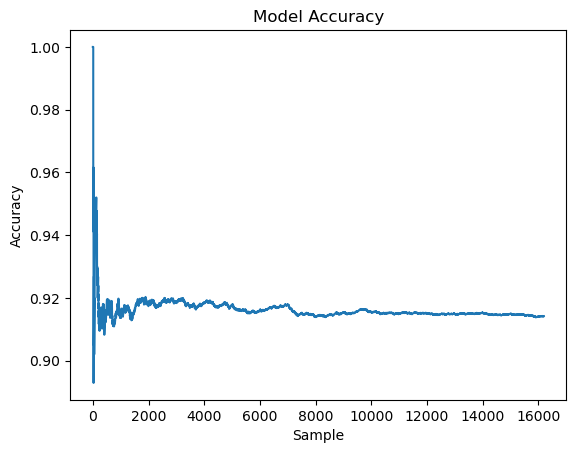

In [2]:
# 세부 감정
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 저장된 모델과 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")
model.to(device)

def sentence_predict(sent):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
data = pd.read_csv("Data/emotionTest.csv")
#sampled_data = data.sample(n=1000)

# 정확도 계산을 위한 변수 초기화
correct_predictions = 0
accuracy_list = []

# 관리할 샘플 인덱스 초기화
sample_index = 0

for index, row in data.iterrows():
    sentence = row['발화문']
    true_label = row['상황']
    predicted_label = sentence_predict(sentence)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    if true_label == predicted_label:
        correct_predictions += 1
    # 현재까지의 정확도를 리스트에 추가
    sample_index += 1
    accuracy_list.append(correct_predictions / sample_index)

accuracy = correct_predictions / len(data)
print(f"정확도: {accuracy * 100:.2f}%")

# 정확도 그래프 그리기
plt.plot(accuracy_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Sample')
plt.savefig('accuracy_graph.png')  # 그래프를 파일로 저장
plt.show()  # 그래프를 화면에 표시


정확도: 93.90%
정밀도: 94.01%
재현율: 93.90%
F1 점수: 93.92%


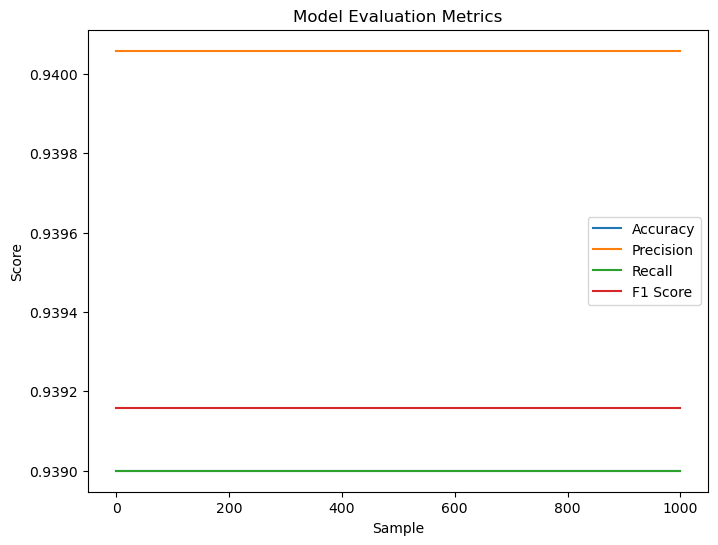

In [12]:
# emotion 0, 1, 2

import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 저장된 모델과 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained("./saved_TF_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_TF_model")

model.to(device)

# 문장 예측 함수
def sentence_predict(sent):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
#data = pd.read_csv("Data/TFTest.tsv", sep='\t')
data = pd.read_csv("./emotionTest.tsv", sep='\t')
sampled_data = data.sample(n=1000)

# 평가 지표 계산을 위한 리스트
true_labels = []
predicted_labels = []

for index, row in sampled_data.iterrows():
    sentence = row['document']
    true_label = row['label']
    predicted_label = sentence_predict(sentence)
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# 평가 지표 계산
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"정확도: {accuracy * 100:.2f}%")
print(f"정밀도: {precision * 100:.2f}%")
print(f"재현율: {recall * 100:.2f}%")
print(f"F1 점수: {f1 * 100:.2f}%")

# 정확도 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(len(true_labels)), [accuracy] * len(true_labels), label='Accuracy')
plt.plot(range(len(true_labels)), [precision] * len(true_labels), label='Precision')
plt.plot(range(len(true_labels)), [recall] * len(true_labels), label='Recall')
plt.plot(range(len(true_labels)), [f1] * len(true_labels), label='F1 Score')
plt.title('Model Evaluation Metrics')
plt.xlabel('Sample')
plt.ylabel('Score')
plt.legend()
plt.savefig('evaluation_metrics.png')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 저장된 모델과 토크나이저 불러오기
model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")
model.to(device)

def sentence_predict(sent):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
data = pd.read_csv("./emotionTest.tsv", sep='\t')
data = data.sample(n=1000)

# 정확도, 정밀도, 재현율, F1-score 계산을 위한 변수 초기화
true_labels = []
predicted_labels = []
accuracy_list = []

for index, row in data.iterrows():
    sentence = row['document']
    true_label = row['predicted_label']
    predicted_label = sentence_predict(sentence)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)
    accuracy_list.append(accuracy_score(true_labels, predicted_labels))

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"정확도: {accuracy * 100:.2f}%")
print(f"정밀도: {precision * 100:.2f}%")
print(f"재현율: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")

# 정확도 그래프 그리기
plt.plot(accuracy_list)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Sample')
plt.savefig('accuracy_graph.png')
plt.show()


TF Model - 정확도: 92.00%, 정밀도: 92.24%, 재현율: 92.00%, F1 점수: 92.04%
Model - 정확도: 57.70%, 정밀도: 69.64%, 재현율: 57.70%, F1 점수: 56.23%


두 모델이 모두 정확한 경우 - 정확도: 57.70%, 정밀도: 88.42%, 재현율: 57.70%, F1 점수: 68.15%


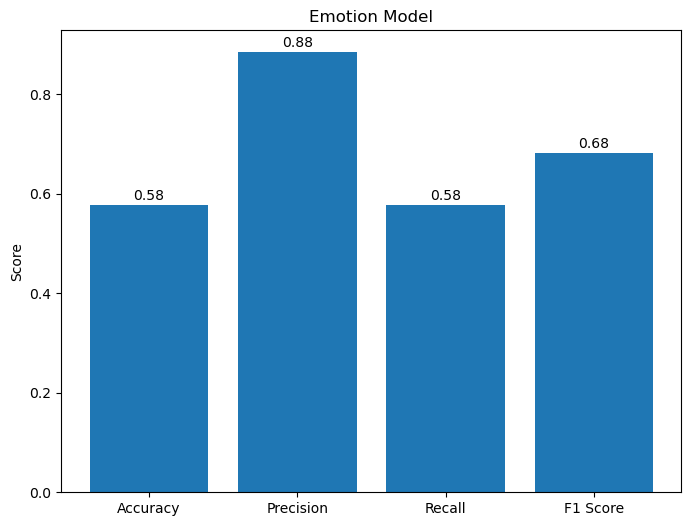

In [9]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# gpu 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 저장된 모델과 토크나이저 불러오기
model_TF = AutoModelForSequenceClassification.from_pretrained("./saved_TF_model")
tokenizer_TF = AutoTokenizer.from_pretrained("./saved_TF_model")

model = AutoModelForSequenceClassification.from_pretrained("./saved_model")
tokenizer = AutoTokenizer.from_pretrained("./saved_model")

model_TF.to(device)
model.to(device)

# 문장 예측 함수
def sentence_predict(sent, model, tokenizer):
    model.eval()
    tokenized_sent = tokenizer(
        [sent],
        return_tensors="pt",
        max_length=128,
        padding=True,
        truncation=True,
        add_special_tokens=True,
    )
    tokenized_sent = {k: v.to(device) for k, v in tokenized_sent.items()}
    with torch.no_grad():
        outputs = model(
            input_ids=tokenized_sent["input_ids"],
            attention_mask=tokenized_sent["attention_mask"],
        )
    logits = outputs[0]
    logits = logits.detach().cpu()
    result = logits.argmax(-1).numpy()[0]
    return result

# 데이터 로드 및 샘플링
data = pd.read_csv("./emotionTest.tsv", sep='\t')
#sampled_data = data.sample(n=1000)

# 평가 지표 계산을 위한 리스트
true_labels_TF = []
predicted_labels_TF = []
true_labels = []
predicted_labels = []
true_both = []
predicted_both = []

for index, row in sampled_data.iterrows():
    sentence = row['document']
    true_label_TF = row['label']
    true_label = row['predicted_label']
    predicted_label_TF = sentence_predict(sentence, model_TF, tokenizer_TF)
    predicted_label = sentence_predict(sentence, model, tokenizer)
    true_labels_TF.append(true_label_TF)
    predicted_labels_TF.append(predicted_label_TF)
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)
    
    # true_label_TF와 true_label이 모두 정답인 경우 true_both에 1 추가
    if true_label_TF == predicted_label_TF:
        true_both.append(1)
    else:
        true_both.append(0)
        
    # predicted_label_TF와 predicted_label이 모두 일치하는 경우 predicted_both에 1 추가
    if true_label == predicted_label:
        predicted_both.append(1)
    else:
        predicted_both.append(0)

# true_label_TF와 true_label이 모두 정답인 경우의 평가 지표 계산
accuracy_both = accuracy_score(true_both, predicted_both)
precision_both = precision_score(true_both, predicted_both, average='weighted')
recall_both = recall_score(true_both, predicted_both, average='weighted')
f1_both = f1_score(true_both, predicted_both, average='weighted')

print(f"두 모델이 모두 정확한 경우 - 정확도: {accuracy_both * 100:.2f}%, 정밀도: {precision_both * 100:.2f}%, 재현율: {recall_both * 100:.2f}%, F1 점수: {f1_both * 100:.2f}%")

# 평가 지표를 리스트로 만듦
metrics = [accuracy_both, precision_both, recall_both, f1_both]

# 각 평가 지표 이름을 리스트로 만듦
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics)

# 그래프에 수치 표시
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.title('Emotion Model')
plt.ylabel('Score')
plt.savefig('evaluation_metrics.png')
plt.show()